# Classification of Arrhythmia

* Dataset consists of 452 different examples spread over 16 classes. Of the 452 examples,

    - 245 are of "normal" people. We also have 12 different types of arrhythmias. 
    
    - Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".


* We have 279 features, which include age, sex, weight, height of patients and other related information. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.


* Our goal is to predict if a person is suffering from arrhythmia or not, and if **yes**, classify it in to one of 12 available groups.

### Dataset Information

Additional Information

This database contains 279 attributes, 206 of which are linear valued and the rest are nominal. 

Concerning the study of H. Altay Guvenir: "The aim is to distinguish between the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal' ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For the time being, there exists a computer program that makes such a classification. However there are differences between the cardiolog's and the programs classification. Taking the cardiolog's as a gold standard we aim to minimise this difference by means of machine learning tools."

The names and id numbers of the patients were recently removed from the database.


Has Missing Values?

Yes 

### Additional Variable Information
    Complete attribute documentation:

      1 Age: Age in years , linear
      2 Sex: Sex (0 = male; 1 = female) , nominal
      3 Height: Height in centimeters , linear
      4 Weight: Weight in kilograms , linear
      5 QRS duration: Average of QRS duration in msec., linear
      6 P-R interval: Average duration between onset of P and Q waves in msec., linear
      7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear
      8 T interval: Average duration of T wave in msec., linear
      9 P interval: Average duration of P wave in msec., linear
      Vector angles in degrees on front plane of:, linear
     10 QRS
     11 T
     12 P
     13 QRST
     14 J

     15 Heart rate: Number of heart beats per minute ,linear
    
     Of channel DI:
      Average width, in msec., of: linear
      16 Q wave
      17 R wave
      18 S wave
      19 R' wave, small peak just after R
      20 S' wave

      21 Number of intrinsic deflections, linear

      22 Existence of ragged R wave, nominal
      23 Existence of diphasic derivation of R wave, nominal
      24 Existence of ragged P wave, nominal
      25 Existence of diphasic derivation of P wave, nominal
      26 Existence of ragged T wave, nominal
      27 Existence of diphasic derivation of T wave, nominal

     Of channel DII: 
      28 .. 39 (similar to 16 .. 27 of channel DI)
     Of channels DIII:
      40 .. 51
     Of channel AVR:
      52 .. 63
     Of channel AVL:
      64 .. 75
     Of channel AVF:
      76 .. 87
     Of channel V1:
      88 .. 99
     Of channel V2:
      100 .. 111
     Of channel V3:
      112 .. 123
     Of channel V4:
      124 .. 135
     Of channel V5:
      136 .. 147
     Of channel V6:
      148 .. 159

     Of channel DI:
      Amplitude , * 0.1 milivolt, of
      160 JJ wave, linear
      161 Q wave, linear
      162 R wave, linear
      163 S wave, linear
      164 R' wave, linear
      165 S' wave, linear
      166 P wave, linear
      167 T wave, linear
      
      168 QRSA , Sum of areas of all segments divided by 10, ( Area= width * height / 2 ), linear
      169 QRSTA = QRSA + 0.5 * width of T wave * 0.1 * height of T wave. (If T is diphasic then the bigger segment is considered), linear

     Of channel DII:
      170 .. 179
     Of channel DIII:
      180 .. 189
     Of channel AVR:
      190 .. 199
     Of channel AVL:
      200 .. 209
     Of channel AVF:
      210 .. 219
     Of channel V1:
      220 .. 229
     Of channel V2:
      230 .. 239
     Of channel V3:
      240 .. 249
     Of channel V4:
      250 .. 259
     Of channel V5:
      260 .. 269
     Of channel V6:
      270 .. 279

Class Labels

       Class code :   Class   :                       Number of instances:
       01             Normal				          245
       02             Ischemic changes (Coronary Artery Disease)   44
       03             Old Anterior Myocardial Infarction           15
       04             Old Inferior Myocardial Infarction           15
       05             Sinus tachycardy			           13
       06             Sinus bradycardy			           25
       07             Ventricular Premature Contraction (PVC)       3
       08             Supraventricular Premature Contraction	    2
       09             Left bundle branch block 		            9	
       10             Right bundle branch block		           50
       11             1. degree AtrioVentricular block	            0	
       12             2. degree AV block		            0
       13             3. degree AV block		            0
       14             Left ventricule hypertrophy 	            4
       15             Atrial Fibrillation or Flutter	            5
       16             Others				           22

In [53]:
### Importing Essential Libraries
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data Reading

In [54]:
df=pd.read_csv("arrhythmia.csv",header=None)

In [55]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [56]:
df.shape

(452, 280)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [58]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


### Data preprocessing

In [59]:
#Creating column names

df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","QRST","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [60]:
df.columns=df_columns
df.to_csv("Cleaned_Arrhthmia.csv")
df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


#### Handling Missing Values

**Checking for null values in dataset**

In [61]:
df.isnull().sum().sum()

0

In [62]:
df = df.replace('?', np.NaN)

In [63]:
nv=pd.isnull(df).sum().sum()
nv

408

**Visualizing  the distribution of our missing data:**

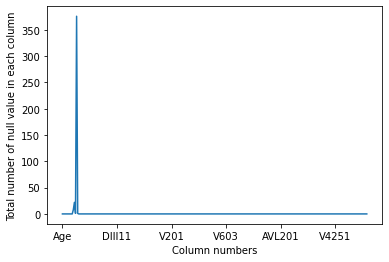

In [64]:
df.isnull().sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total number of null value in each column')
plt.show()

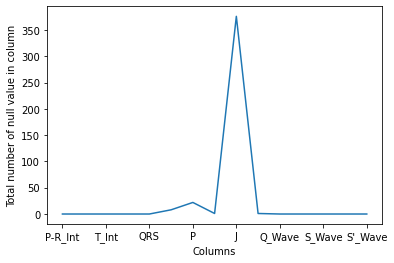

In [65]:
pd.isnull(df).sum()[5:20].plot(kind="line")
plt.xlabel('Columns')
plt.ylabel('Total number of null value in column')
plt.show()

**Column ***'QRST'*** contains more than 350 missing values out of total 452 instances. so we will drop column ***'QRST'***. other attributes have comparatively less null values. So instead of droping, we will replace the null value of other attributes with their mean values.**

In [66]:
df.drop(columns = 'J', inplace=True)

In [67]:
df.isnull().sum()

Age        0
Sex        0
Height     0
Weight     0
QRS_Dur    0
          ..
V6276      0
V6277      0
V6278      0
V6279      0
class      0
Length: 279, dtype: int64

In [68]:
null_columns = df.columns[df.isnull().any()]
null_counts = df[null_columns].isnull().sum()

print("Columns with null values and their counts:")
print(null_counts)


Columns with null values and their counts:
T              8
P             22
QRST           1
Heart_Rate     1
dtype: int64


In [72]:
df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   T           444 non-null    object
 1   P           430 non-null    object
 2   QRST        451 non-null    object
 3   Heart_Rate  451 non-null    object
dtypes: object(4)
memory usage: 14.2+ KB


In [73]:
df[null_columns] = df[null_columns].apply(pd.to_numeric, errors='coerce')

In [74]:
df[null_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           444 non-null    float64
 1   P           430 non-null    float64
 2   QRST        451 non-null    float64
 3   Heart_Rate  451 non-null    float64
dtypes: float64(4)
memory usage: 14.2 KB


In [75]:
for column in null_columns:
    df[column].fillna(df[column].mean(), inplace=True)

print(df.isnull().sum())


Age        0
Sex        0
Height     0
Weight     0
QRS_Dur    0
          ..
V6276      0
V6277      0
V6278      0
V6279      0
class      0
Length: 279, dtype: int64


In [76]:
df[null_columns].isna().sum()

T             0
P             0
QRST          0
Heart_Rate    0
dtype: int64

**As our dataframe is completely cleaned and preprocessed.**

## Exploratory Data Analysis (EDA)

Analyzing data sets to summarize their main characteristics.

**Making List of all the type of Arrythmia corresponsing to their class label**

In [79]:
target=df["class"]

new_df =df.drop(columns ="class")


In [80]:
class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

### Analyzing the dataset and check how many examples we have for each class:
we need to sort our dataset with respect to class attributes to count the number of instances available for each class

In [81]:
sorted_data=df.sort_values(by=["class"])

In [83]:
# Counting the number of instances for each class

class_count = sorted_data["class"].value_counts(sort=False).tolist()
class_count

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

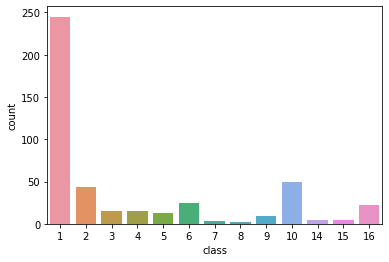

In [84]:
sns.countplot(x ='class',data =df) 
plt.show() 

In [95]:
values = class_count[0:10]
values.extend([0,0,0])
values.extend(class_count[10:13])
values

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]

In [107]:
total_values = sum(values)
print("Total Values:", total_values)

# Calculate percentages
percentages = [v / total_values * 100 for v in values]
print("Calculated Percentages:")
percentages


Total Values: 452
Calculated Percentages:


[54.20353982300885,
 9.734513274336283,
 3.3185840707964607,
 3.3185840707964607,
 2.8761061946902653,
 5.530973451327434,
 0.6637168141592921,
 0.4424778761061947,
 1.991150442477876,
 11.061946902654867,
 0.0,
 0.0,
 0.0,
 0.8849557522123894,
 1.1061946902654867,
 4.867256637168142]

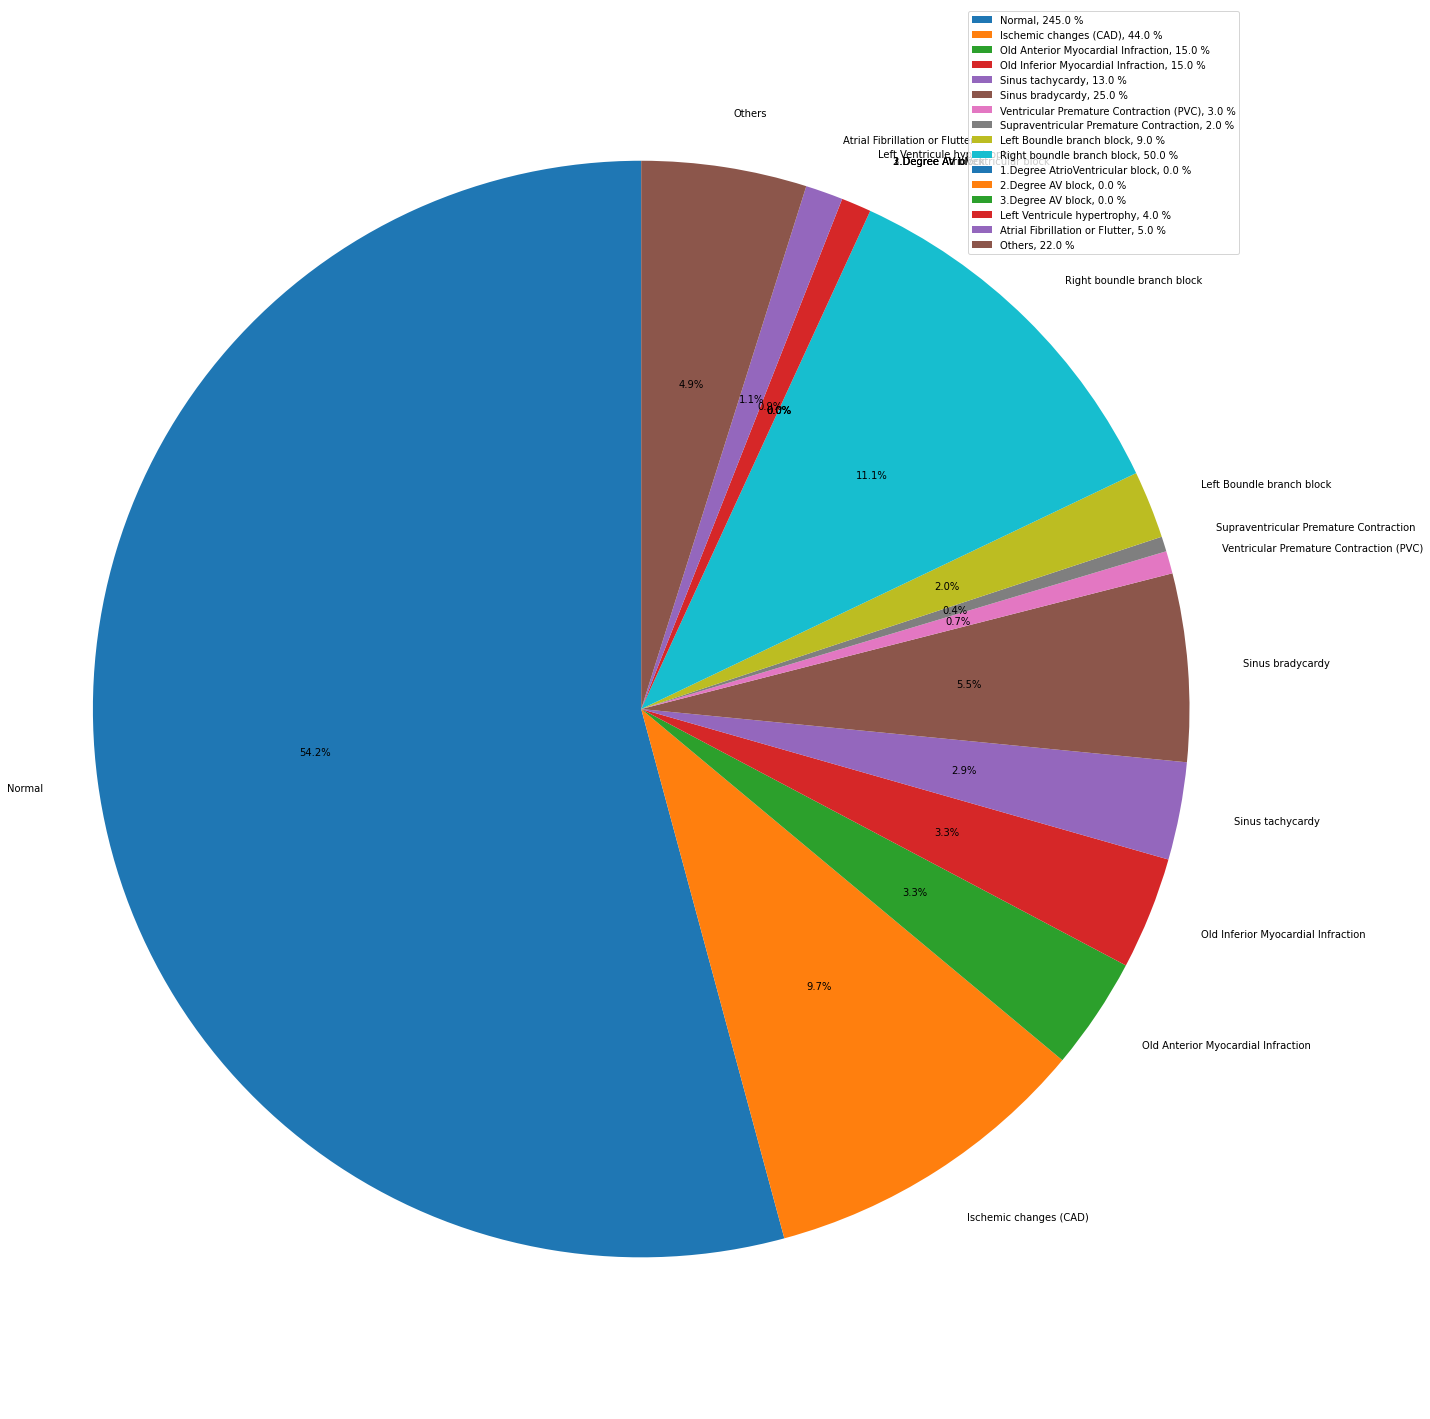

In [115]:
fig, ax = plt.subplots(figsize=(20,20))
patches, texts, autotexts = plt.pie(values, autopct='%1.1f%%', startangle=90, labels=class_names)


plt.setp(autotexts, color='black')
plt.axis('equal')

# Display the legend
plt.legend(loc='best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(class_names, values)])

plt.tight_layout()
plt.show()

**We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.**

### Handling Outliers & Data Visualization


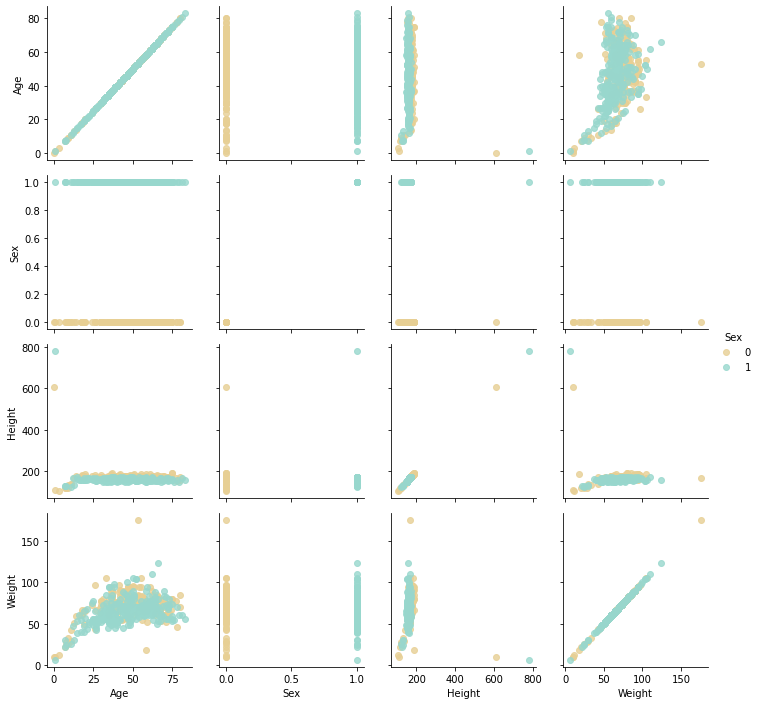

In [121]:
g = sns.PairGrid(df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

**According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights**

In [122]:
sorted(df['Height'], reverse=True)[:10]

[780, 608, 190, 190, 190, 188, 186, 186, 186, 185]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969). Replacing **780** and **608** with **180** and **108** cm respectively

In [123]:
df['Height']= df['Height'].replace(608,108)
df['Height']= df['Height'].replace(780,180)

In [124]:
sorted(df['Weight'], reverse=True)[:10]

[176, 124, 110, 106, 105, 105, 104, 104, 100, 98]

**176 kgs** is a possible weight. so we'll keep them.

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


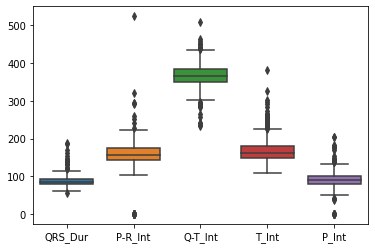

In [127]:
sns.boxplot(data= df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])
plt.show()

**PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration.**

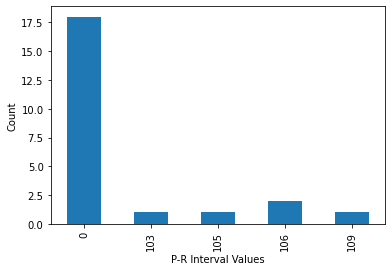

In [129]:
df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count')
plt.show()

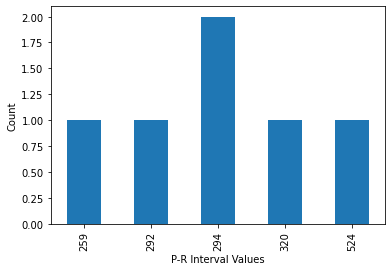

In [131]:
df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count')
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

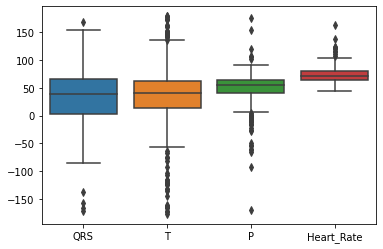

In [135]:
sns.boxplot(data=df[["QRS","T","P","Heart_Rate"]])

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<Axes: >

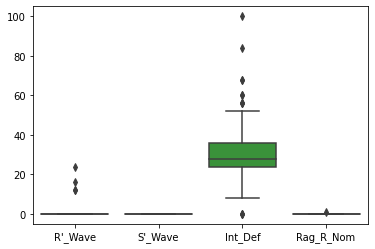

In [137]:
sns.boxplot(data=df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

*S*'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [138]:
df["S'_Wave"].value_counts().sort_index(ascending=False)

0    452
Name: S'_Wave, dtype: int64

In [140]:
df["V101"].value_counts().sort_index(ascending=False).head()

216    1
112    1
84     1
72     1
68     1
Name: V101, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped. 

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

In [141]:
df["V201"].value_counts().sort_index(ascending=False)

216     1
136     1
84      1
72      1
60      5
56      4
52     12
48     19
44     53
40     68
36     74
32     69
28     48
24     39
20     15
16      6
12      2
0      34
Name: V201, dtype: int64

In [142]:
df["V301"].value_counts().sort_index(ascending=False)

132     1
88      2
76      2
72      1
68      2
64      3
60     16
56     26
52     57
48     68
44     76
40     74
36     49
32     32
28     13
24      4
20      6
16      1
0      19
Name: V301, dtype: int64

In [143]:
df["V501"].value_counts().sort_index(ascending=False)

136      1
120      2
116      1
108      1
96       1
92       1
84       1
76       2
72       3
68       4
64       5
60       9
56      22
52      67
48     105
44     104
40      73
36      29
32      12
28       3
24       2
20       1
0        3
Name: V501, dtype: int64

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


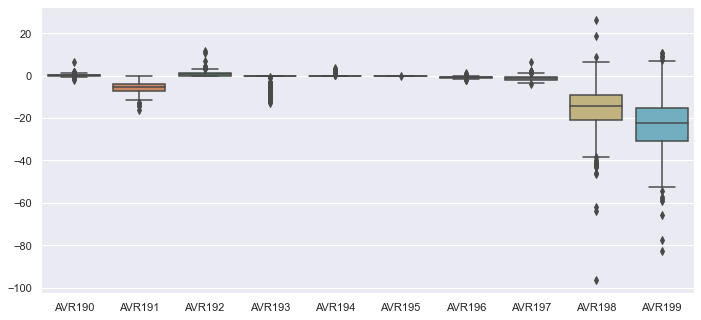

In [145]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data= df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]])
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


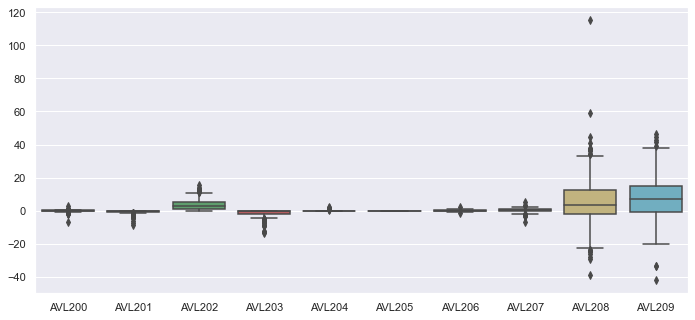

In [147]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data= df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]])
plt.show()

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


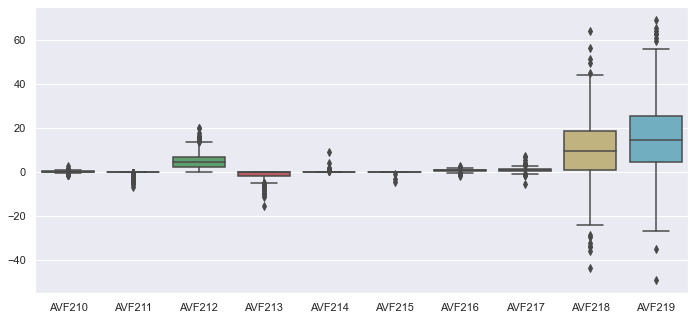

In [148]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data= df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]])
plt.show()

In [152]:
#finding correlation with target feature using pearson correlation

target= df["class"]
pearsoncorr = df.corrwith(other = target,method='pearson')
pearsoncorr.values

array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02,  2.55318081e-03, -7.46094330e-04,
        6.76850797e-02,  8.65740835e-03,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

## Feature Scaling and Splitting dataset

In [153]:
target=df["class"]

X =df.drop(columns ="class")

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target ,test_size=0.2, random_state=1)

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [156]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

In [159]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from scikitplot.metrics import plot_confusion_matrix,plot_roc

### KNN Classifier

In [160]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [161]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

In [162]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6454293628808865
Test Recall score: 0.6373626373626373


array([[51,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [163]:
result = result.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)
result

<ipython-input-163-91af607fd206>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363


### Logistic regression

In [170]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(multi_class='ovr',solver = 'saga', penalty='l2',random_state = 0) 
lgclassifier.fit(X_train, y_train) 
y_pred = lgclassifier.predict(X_test)

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hitam/opt/anaconda3/lib/python3.8/site-pack

In [171]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))


In [172]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.9058171745152355
Test Recall score: 0.7802197802197802


array([[48,  1,  0,  0,  0,  0,  0,  0,  0,  0,  3],
       [ 2,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]])

In [173]:
result = result.append(pd.Series({'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}),ignore_index=True )
result

<ipython-input-173-dd44d0b7b472>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220


### Decision Tree Classifier

In [174]:
from sklearn.tree import DecisionTreeClassifier 
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtclassifier.fit(X_train, y_train) 
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [175]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

In [176]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8421052631578947
Test Recall score: 0.7142857142857143


array([[51,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1]])

In [177]:
result = result.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True )
result

<ipython-input-177-3132b43d6388>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286


### Linear SVM

In [178]:
from sklearn.svm import LinearSVC 
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train) 
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

In [179]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
lsvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [180]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8808864265927978
Test Recall score: 0.7912087912087912


array([[49,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]])

In [181]:
result = result.append(pd.Series({'Model':'Linear SVC','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}),ignore_index=True )
result

<ipython-input-181-5a37d46dfa87>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Linear SVC','Train Accuracy':lsvc_train_accuracy,'Test Accuracy':lsvc_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209


### Kernelized SVM

In [182]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

In [183]:
ksvc_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
ksvc_test_recall = recall_score(y_test, y_pred_test,average="weighted")

ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [185]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8476454293628809
Test Recall score: 0.7692307692307693


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [186]:
result = result.append(pd.Series({'Model':'Kernelized SVC','Train Accuracy':ksvc_train_accuracy,'Test Accuracy':ksvc_test_accuracy}),ignore_index=True )
result

<ipython-input-186-8a4d9065fc18>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Kernelized SVC','Train Accuracy':ksvc_train_accuracy,'Test Accuracy':ksvc_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231


### Random Forest Classifier

In [187]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

In [188]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

In [189]:
print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9418282548476454
Test Recall score: 0.7692307692307693


array([[50,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0]])

In [190]:
result = result.append(pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy,'Test Accuracy':rf_test_accuracy}),ignore_index=True )
result

<ipython-input-190-d027b4582fe8>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy,'Test Accuracy':rf_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231


**We found that the best model in term of recall Score is linear SVM with accuracy percentage of **79.12** over other models. We also found that Logestic Regression has better accuracy score.**

# PCA

We will be using PCA(Principal Component Analysis) to reduce the dimension of our sampled dataset to get best feature to find better accuracy.

In [275]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 
pca.fit(X_train)
pca.n_components_

94

In [276]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [279]:
X_test_pca.shape,X_train_pca

((91, 94),
 array([[ -2.80179479,  -0.56529015,   0.58859729, ...,   0.69749864,
           0.05003135,   0.0851964 ],
        [-10.07284727,   4.96387026,   1.60631022, ...,  -1.16475692,
          -0.38985423,  -0.21169677],
        [ -4.70275936, -16.90996325,  -1.36992852, ...,   0.40814166,
           0.27683695,   0.45556877],
        ...,
        [ -1.64719994,   0.17959407,  -1.2837701 , ...,   0.34641495,
           0.50130219,  -0.85677789],
        [  5.84647557,   2.12684732,  -0.20736488, ...,  -0.29222319,
           0.87971649,   0.09757179],
        [ -3.21494315,  -0.65049399,  -3.96557403, ...,   1.2300225 ,
          -0.2343165 ,  -0.63511884]]))

In [277]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

## KNN with PCA

In [280]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

In [281]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [282]:
print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6509695290858726
Test Recall score: 0.6373626373626373


array([[51,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [283]:
result = result.append(pd.Series({'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True)
result

<ipython-input-283-4e5f875ee653>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'KNN Classifier with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True)


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231
6,KNN Classifier with PCA,0.650970,0.637363


**we didn't find any improvement on PCA data with knn classifier model.**

## Logestic with PCA 

In [284]:
from sklearn.linear_model import LogisticRegression
lgp_clf = LogisticRegression(solver='saga',C=0.01)
lgp_clf.fit(X_train_pca, y_train)
y_pred_train = lgp_clf.predict(X_train_pca)
y_pred_test = lgp_clf.predict(X_test_pca)

/Users/hitam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [285]:
lgp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lgp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lgp_train_accuracy = accuracy_score(y_train, y_pred_train)
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [286]:
print('Train Recall score: {}'
      .format(lgp_train_recall))
print('Test Recall score: {}'
      .format(lgp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7811634349030471
Test Recall score: 0.7582417582417582


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1]])

In [287]:
result = result.append(pd.Series({'Model':'Logestic Regression with PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}),ignore_index=True )
result

<ipython-input-287-2da0b428858a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Logestic Regression with PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231
6,KNN Classifier with PCA,0.650970,0.637363
7,Logestic Regression with PCA,0.781163,0.758242


## Linear svm with PCA 

In [288]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

In [289]:
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [290]:
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7922437673130194
Test Recall score: 0.8021978021978022


array([[49,  2,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  1,  1,  0,  0,  0,  0,  0,  1,  0,  1]])

In [291]:
result = result.append(pd.Series({'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}),ignore_index=True )
result

<ipython-input-291-3bcbb0c2343d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Linear SVC with PCA','Train Accuracy':lsvcp_train_accuracy,'Test Accuracy':lsvcp_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231
6,KNN Classifier with PCA,0.650970,0.637363
7,Logestic Regression with PCA,0.781163,0.758242
8,Linear SVC with PCA,0.792244,0.802198


## Kernal svm with PCA

In [292]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

In [293]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [294]:
print('Train Recall score: {}'
      .format(ksvcp_train_recall))
print('Test Recall score: {}'
      .format(ksvcp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8227146814404432
Test Recall score: 0.7582417582417582


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [295]:
result = result.append(pd.Series({'Model':'kernelized SVC with PCA','Train Accuracy':ksvcp_train_accuracy,'Test Accuracy':ksvcp_test_accuracy}),ignore_index=True )
result

<ipython-input-295-e82c86db15a4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'kernelized SVC with PCA','Train Accuracy':ksvcp_train_accuracy,'Test Accuracy':ksvcp_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231
6,KNN Classifier with PCA,0.650970,0.637363
7,Logestic Regression with PCA,0.781163,0.758242
8,Linear SVC with PCA,0.792244,0.802198
9,kernelized SVC with PCA,0.822715,0.758242


## DecisionTree Classifier with PCA

In [296]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

In [297]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [298]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7506925207756233
Test Recall score: 0.5934065934065934


array([[46,  3,  0,  0,  1,  0,  0,  0,  2,  0,  0],
       [ 5,  2,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0]])

In [299]:
result = result.append(pd.Series({'Model':'DecisionTree Classifier with PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}),ignore_index=True )
result

<ipython-input-299-f53d37aaaba4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'DecisionTree Classifier with PCA','Train Accuracy':dtp_train_accuracy,'Test Accuracy':dtp_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231
6,KNN Classifier with PCA,0.650970,0.637363
7,Logestic Regression with PCA,0.781163,0.758242
8,Linear SVC with PCA,0.792244,0.802198
9,kernelized SVC with PCA,0.822715,0.758242


## Random Forest Classifier With PCA

In [300]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train_pca, y_train)
y_pred_train = rfp_clf.predict(X_train_pca)
y_pred_test = rfp_clf.predict(X_test_pca)

In [301]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [302]:
print('Train Recall score: {}'
      .format(rfp_train_recall))
print('Test Recall score: {}'
      .format(rfp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 1.0
Test Recall score: 0.7252747252747253


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [303]:
result = result.append(pd.Series({'Model':'Random Forest Classifier with PCA','Train Accuracy':rfp_train_accuracy,'Test Accuracy':rfp_test_accuracy}),ignore_index=True )
result

<ipython-input-303-dcba1a4bbb51>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(pd.Series({'Model':'Random Forest Classifier with PCA','Train Accuracy':rfp_train_accuracy,'Test Accuracy':rfp_test_accuracy}),ignore_index=True )


,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.645429,0.637363
1,Logestic Regression,0.905817,0.780220
2,Decision Tree Classifier,0.842105,0.714286
3,Linear SVC,0.880886,0.791209
4,Kernelized SVC,0.847645,0.769231
5,Random Forest Classifier,0.941828,0.769231
6,KNN Classifier with PCA,0.650970,0.637363
7,Logestic Regression with PCA,0.781163,0.758242
8,Linear SVC with PCA,0.792244,0.802198
9,kernelized SVC with PCA,0.822715,0.758242


## Result

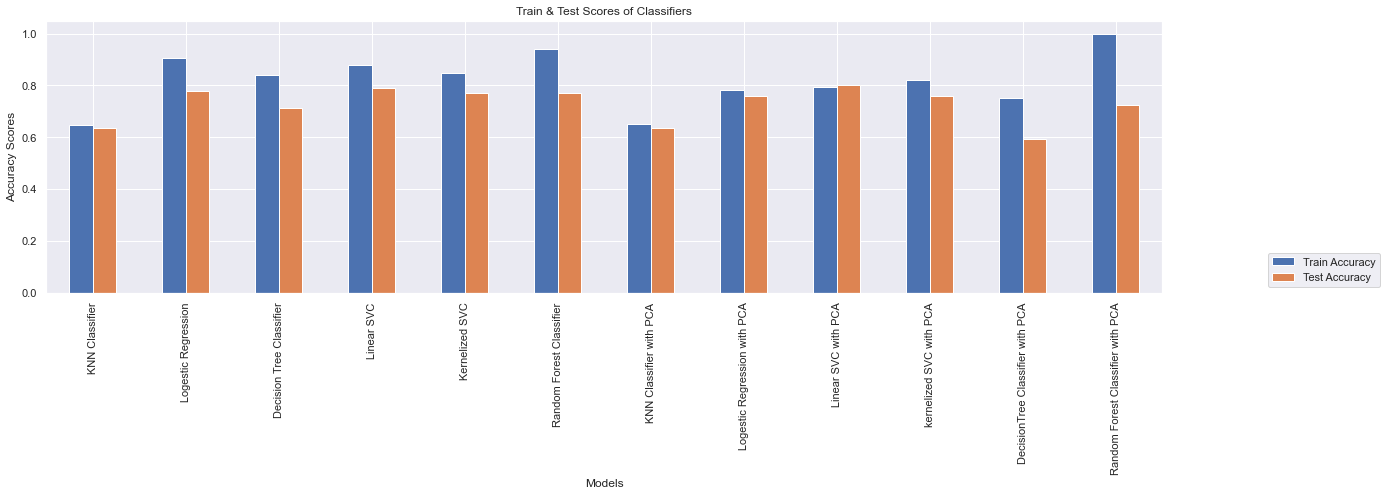

In [304]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show()

## Conclusion

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables. 

The Best model in term of recall score is **Linear SVM with PCA** having accuracy of **80.21%.**